In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.optimize import fsolve
import yaml
import control
%load_ext autoreload
%autoreload 2

number of nonpositive real parts of long open eig: 4
number of nonpositive real parts of long closed eig: 4
number of nonpositive real parts of lat open eig: 4
number of nonpositive real parts of lat closed eig: 5


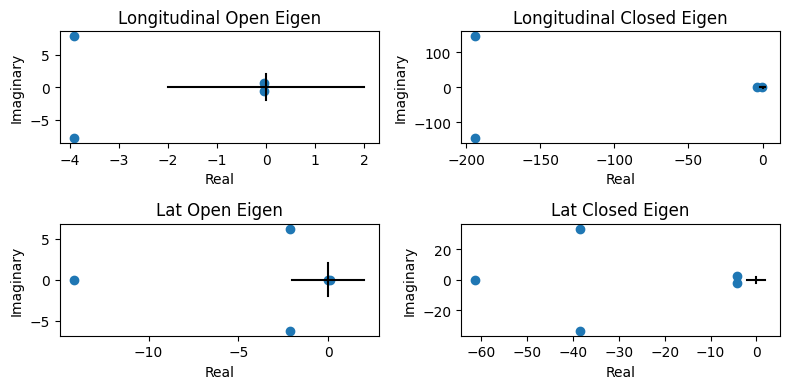

In [12]:
thrust_init=5.949
elevator_init=-0.2696
aileron_init=0.0
rudder_init=0

x_init = 0
y_init = 0
z_init = -100
phi_init = 0
theta_init = 0.1023
psi_init = 0
u_init = 19.895
v_init = 0
w_init = 2.043
p_init = 0
q_init = 0
r_init = 0

# helix
# way1 = np.array([50*2 ,-14*2,  -100])
# way2 = np.array([86*2,-50*2,  -120])
# way3 = np.array([100*2,-100*2,  -140])
# way4 = np.array([86*2,-150*2,  -160])
# way5 = np.array([50*2,-186*2,  -180])
# way6 = np.array([0*2, -200*2,  -200])
# way7 = np.array([-50*2, -186*2,  -220])
# way8 = np.array([-86*2, -150*2, -240])
# way9 = np.array([-100*2, -100*2, -260])
# way10 = np.array([-86*2, -50*2, -280])
# way11 = np.array([-50*2, -14*2, -300])
# way12 = np.array([-0, -0, -320])
# waypoints = [way1, way2, way3, way4, way5, way6, way7, way8, way9, way10, way11, way12]

# wave
way1 = np.array([100, 100, -100])
way2 = np.array([175, 150, -120])
way3 = np.array([250, 150, -140])
way4 = np.array([325, 100, -110])
way5 = np.array([400, 50, -90])
way6 = np.array([475, 50, -120])
way7 = np.array([550, 100, -150])

waypoints = [way1, way2, way3, way4, way5, way6, way7]


input_init = np.array([[thrust_init], [elevator_init],[aileron_init],[rudder_init]])
state_init = np.array([[x_init], [y_init], [z_init], 
                       [u_init], [v_init], [w_init],
                       [phi_init], [theta_init], [psi_init], 
                       [p_init], [q_init], [r_init]])



from airplane_3D_EOM import simulate_airplane
duration = 50.0
dt = 0.01
sol_closed, state_des_list, inputs_list, t_list, x_wind_list, y_wind_list, z_wind_list = simulate_airplane(state_init.squeeze(), waypoints, input_init.squeeze(),\
                                                 duration, dt, controller="LQR")


In [8]:
# wrap all angles between -pi and pi
sol_closed.y[8] = (sol_closed.y[8] + np.pi) % (2 * np.pi) - np.pi

In [9]:
np.save("sol_closed.npy", sol_closed.y)

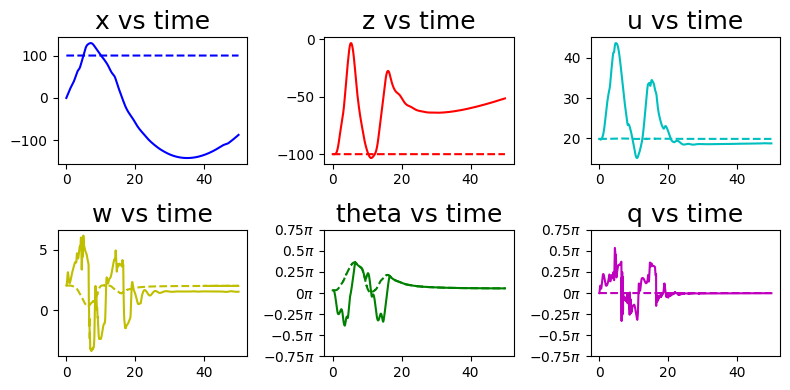

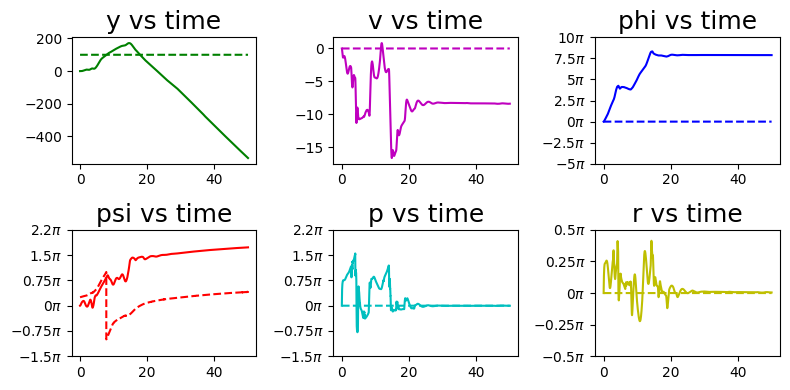

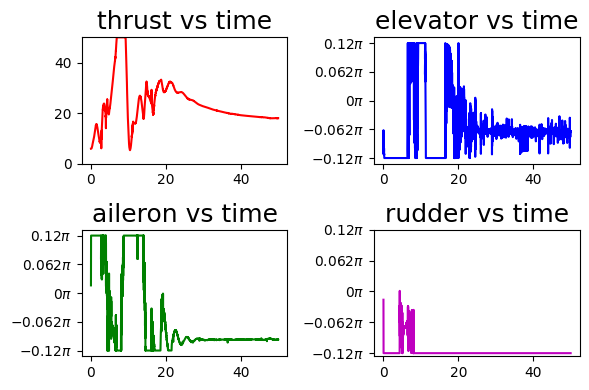

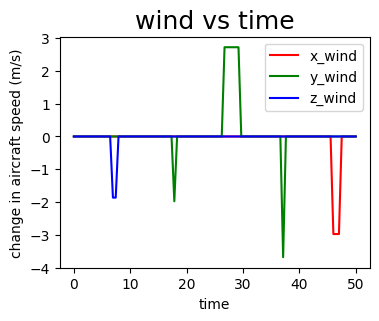

In [14]:
from airplane_plot import plot_airplane_long, plot_airplane_lat, plot_airplane_inputs, plot_wind

plot_airplane_long(sol_closed, state_des_list, t_list)
plot_airplane_lat(sol_closed, state_des_list, t_list)
plot_airplane_inputs(inputs_list, t_list)
plot_wind(x_wind_list, y_wind_list, z_wind_list, np.linspace(0, t_list[-1], len(x_wind_list)))